<a href="https://colab.research.google.com/github/tar697/AI-ML-project/blob/main/Paisa%20bazar%20project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - This project focuses on building a predictive model that classifies individuals into one of three credit score categories — Good, Standard, or Poor — based on various financial and demographic features. The dataset, sourced from Paisabazaar, contains 100,000 records and includes attributes such as income, credit history, loan details, payment behaviour, and more.



#**Project Summary** - This project builds a machine learning model to predict credit scores (Good, Standard, Poor) using financial and behavioral data from 100,000 customers. After cleaning and encoding the dataset, a Random Forest Classifier is trained to classify credit scores based on features like income, loan history, payment behaviour, and credit utilization. The model is evaluated using accuracy and classification reports, and feature importance is visualized to highlight key factors influencing creditworthiness. This solution can support financial institutions in automated credit risk assessment.













# **GitHub Link**: https://github.com/tar697/AI-ML-project/blob/main/Paisabazar%20project.ipynb

# **Problem Statement**: Creting a predictive model that classifies individuals into credit score categories (Good, Standard, Poor) based on features such as income, debt, credit history, loan behavior, and payment patterns?




In [2]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# 2. Load dataset
df = pd.read_csv("/content/sample_data/dataset-2.csv")

In [4]:
# 3. Drop unnecessary columns
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

In [5]:
# 4. Encode target variable
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])  # Poor=0, Standard=1, Good=2


In [6]:
# 5. One-hot encode categorical features
categorical_cols = ['Occupation', 'Type_of_Loan', 'Credit_Mix',
                    'Payment_of_Min_Amount', 'Payment_Behaviour']
df = pd.get_dummies(df, columns=categorical_cols)

In [7]:
# 6. Check for missing values
if df.isnull().sum().sum() > 0:
    df = df.dropna()

In [8]:
# 7. Split data into features and target
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']


In [9]:
# 8. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Train a model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# 10. Make predictions and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 975    1  260]
 [  11 1666  317]
 [ 206  391 3005]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1236
           1       0.81      0.84      0.82      1994
           2       0.84      0.83      0.84      3602

    accuracy                           0.83      6832
   macro avg       0.82      0.82      0.82      6832
weighted avg       0.83      0.83      0.83      6832

Accuracy Score: 0.8264051522248244


/tmp/ipython-input-22-682825798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df.head(15), x='Importance', y='Feature', palette='viridis')


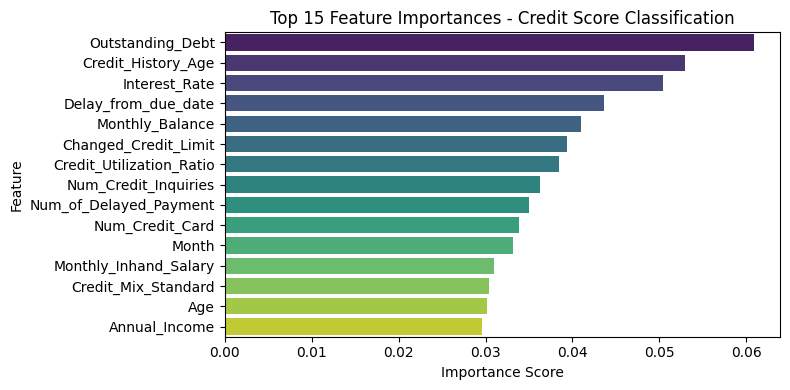

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(8, 4))
sns.barplot(data=feature_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - Credit Score Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-330600783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Credit_Score', palette='Set2')


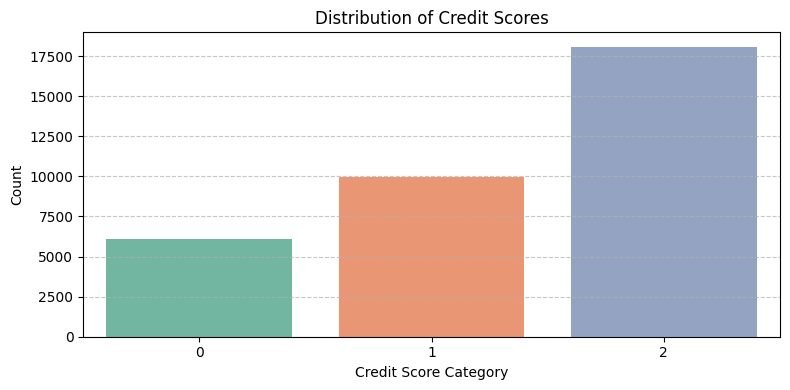

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Credit_Score', palette='Set2')
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-2699868482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', palette='pastel')


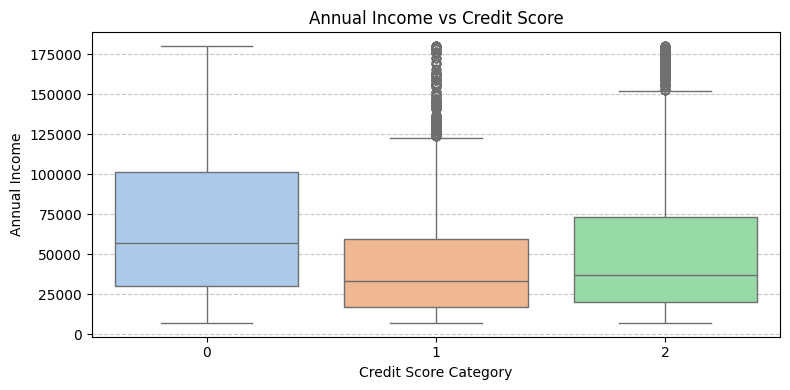

In [20]:
# Plot: Boxplot of Annual Income for each Credit Score category
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', palette='pastel')
plt.title("Annual Income vs Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Annual Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-2869619515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Credit_Score', y='Interest_Rate', palette='Set3')


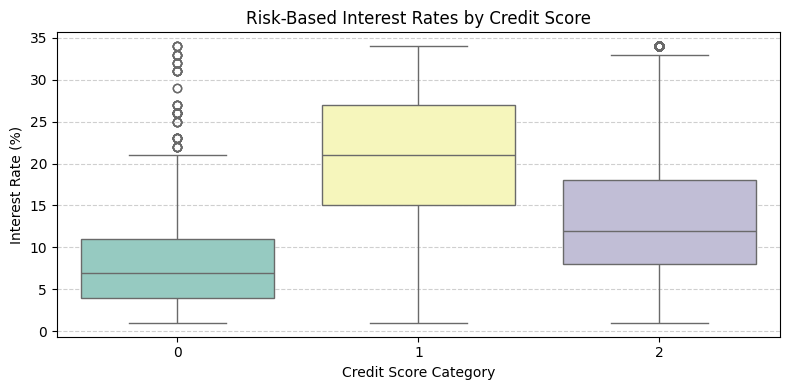

In [19]:

# Plot boxplot of Interest Rate vs Credit Score
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Credit_Score', y='Interest_Rate', palette='Set3')
plt.title("Risk-Based Interest Rates by Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Interest Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

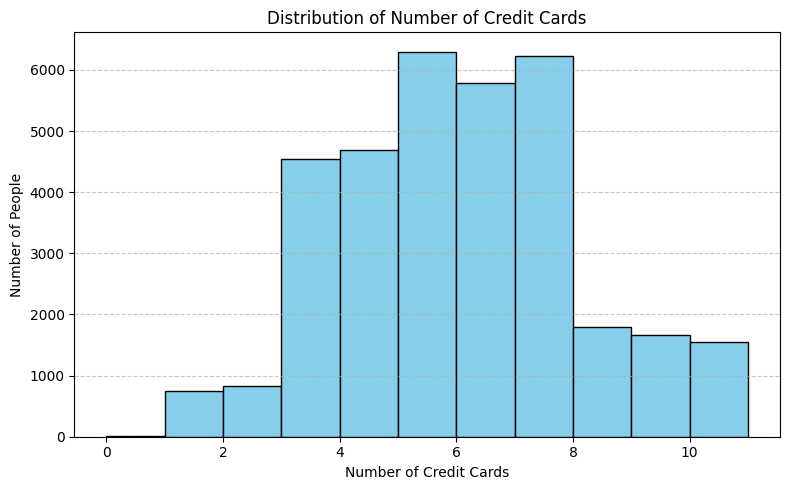

In [18]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Num_Credit_Card'], bins=range(0, int(df['Num_Credit_Card'].max()) + 1), edgecolor='black', color='skyblue')
plt.title("Distribution of Number of Credit Cards")
plt.xlabel("Number of Credit Cards")
plt.ylabel("Number of People")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()